<a href="https://colab.research.google.com/github/BelajarManajemenRisiko/Digital_Risk_Management-Scorecard_Kredit/blob/main/Bab_2_Model_Score_Kredit_dengan_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Persiapan

In [93]:
# Memperbarui Library
!pip install scikit-learn --upgrade

import sklearn as skl
print(skl. __version__) 

1.0.2


# Membaca Data

## 2.3.2.1 Persiapan data dan impor ke Python

Impor data yang akan digunakan untuk membuat model

In [94]:
# library panda untuk menggunakan data frame
import pandas as pd

# Impor data dari excel xls ke Python
# Pembaca dapat langsung menunjuk kepada file excel yang terletak di website pendamping buku ini
# atau mengunduh terlebih dahulu dan menunjuk ke file excel di lokasi hard drive
# contoh: df = pd.read_excel('C:\User\pembaca\downloads\Bab_2_Scorecard_Dataset.xlsx')

df = pd.read_excel('https://github.com/BelajarManajemenRisiko/Digital_Risk_Management-Scorecard_Kredit/raw/main/Bab_2_Scorecard_Dataset.xlsx')

## # 2.3.2.3 Struktur data

In [95]:
# Melihat sample dari dataset
df.head(10) # Menampilkan 10 baris teratas dari dataframe df

,ID,gagal_bayar,Lama_Cicilan,Tujuan_Pinjaman,Jumlah_Pinjaman,Pekerjaan,Pendapatan_perbulan,Lama_Bekerja,Status,Kepemilikan_Rumah,Alamat_Rumah,Alamat_Kantor,Usia,Lama_tinggal_ditempat_sekarang,SLIK_Kolektibilitas,SLIK_Cicilan_Bulanan,SLIK_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Type,Device_Apps_Installed,Device_Active_Since,Device_Apps_Segmentation,Mobile_Provider,Mobile_Number_Active_Since,Email_Domain_Type
0,ABC0001,0_Bayar,1,elektronik,500000,1_pegawai_tetap,5. >20 juta,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_3,Daerah_3,67.0,4_>10_tahun,Kolek 1,859684.752267,0.000000e+00,305,192,Android,6,2_1_ke_3_tahun,Social_Media,Telco_A,1_Kurang_1_bulan,Public_Domain
1,ABC0002,1_Gagal,1,peralatan_rumahtangga,2000000,1_pegawai_tetap,1. < 1 juta,3_1-4_tahun_kerja,1_belum_menikah,1_milik_sendiri,Daerah_2,Daerah_2,22.0,2_1-5_tahun,Kolek 3,743722.804144,1.301412e+06,252,86,IOS,9,3_Lebih_3_tahun,Games,Telco_A,1_Kurang_1_bulan,Public_Domain
2,ABC0003,0_Bayar,3,makanan,1000000,3_wiraswasta,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_2,Daerah_1,49.0,3_5-10_tahun,Kolek 1,265387.462890,0.000000e+00,858,97,Android,36,3_Lebih_3_tahun,Games,Telco_A,2_Kurang_1_tahun,Public_Domain
3,ABC0004,0_Bayar,6,liburan,2000000,1_pegawai_tetap,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_1,Daerah_1,45.0,4_>10_tahun,Kolek 3,443234.967513,8.094420e+05,108,159,Android,14,3_Lebih_3_tahun,Online_Lending,Telco_E,2_Kurang_1_tahun,Professional_Domain
4,ABC0005,1_Gagal,4,pendidikan,1000000,1_pegawai_tetap,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_3,Daerah_3,53.0,4_>10_tahun,Kolek 2,102046.058576,7.548064e+05,487,63,Android,10,3_Lebih_3_tahun,Shopping,Telco_D,1_Kurang_1_bulan,Public_Domain
5,ABC0006,0_Bayar,5,makanan,500000,3_wiraswasta,5. >20 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_1,Daerah_2,35.0,4_>10_tahun,Kolek 3,480608.200003,3.222612e+06,595,200,Android,5,3_Lebih_3_tahun,Social_Media,Telco_A,2_Kurang_1_tahun,Public_Domain
6,ABC0007,0_Bayar,1,liburan,500000,1_pegawai_tetap,3. 5 - 10 juta,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_2,Daerah_3,53.0,4_>10_tahun,Kolek 3,133535.433266,4.303138e+05,334,172,Android,37,3_Lebih_3_tahun,Productivity,Telco_C,5_Lebih_5_tahun,Public_Domain
7,ABC0008,0_Bayar,5,buka_bisnis,500000,4_tidak_bekerja,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,2_sewa,Daerah_1,Daerah_1,35.0,2_1-5_tahun,Kolek 3,384367.579947,5.326622e+04,107,186,Android,35,3_Lebih_3_tahun,Productivity,Telco_E,5_Lebih_5_tahun,Public_Domain
8,ABC0009,0_Bayar,1,peralatan_rumahtangga,500000,3_wiraswasta,4. 10 - 20 juta,4_4-7_tahun_kerja,3_bercerai,1_milik_sendiri,Daerah_2,Daerah_1,61.0,4_>10_tahun,Kolek 3,527874.467181,1.954899e+06,45,235,IOS,17,2_1_ke_3_tahun,Social_Media,Telco_A,3_1_ke_2_tahun,Public_Domain
9,ABC0010,1_Gagal,3,liburan,500000,4_tidak_bekerja,1. < 1 juta,1_tidak_bekerja,3_bercerai,1_milik_sendiri,Daerah_2,Daerah_2,28.0,2_1-5_tahun,Kolek 1,226586.344920,0.000000e+00,254,285,Android,17,2_1_ke_3_tahun,Social_Media,Telco_C,1_Kurang_1_bulan,Public_Domain


In [96]:
# Melihat penjelasan singkat dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              1000 non-null   object 
 1   gagal_bayar                     1000 non-null   object 
 2   Lama_Cicilan                    1000 non-null   int64  
 3   Tujuan_Pinjaman                 1000 non-null   object 
 4   Jumlah_Pinjaman                 1000 non-null   int64  
 5   Pekerjaan                       988 non-null    object 
 6   Pendapatan_perbulan             990 non-null    object 
 7   Lama_Bekerja                    973 non-null    object 
 8   Status                          996 non-null    object 
 9   Kepemilikan_Rumah               997 non-null    object 
 10  Alamat_Rumah                    1000 non-null   object 
 11  Alamat_Kantor                   1000 non-null   object 
 12  Usia                            999

## # 2.3.2.4 Tipe data

In [97]:
# Merubah tipe data menjadi tipe karakter 
df['ID'] = df.ID.astype('category')
df['gagal_bayar'] = df.gagal_bayar.astype('category')
df['Pekerjaan'] = df.Pekerjaan.astype('category')
df['Tujuan_Pinjaman'] = df.Tujuan_Pinjaman.astype('category')
df['Pendapatan_perbulan'] = df.Pendapatan_perbulan.astype('category')
df['Lama_Bekerja'] = df.Lama_Bekerja.astype('category')
df['Status'] = df.Status.astype('category')
df['Kepemilikan_Rumah'] = df.Kepemilikan_Rumah.astype('category')
df['Alamat_Rumah'] = df.Alamat_Rumah.astype('category')
df['Alamat_Kantor'] = df.Alamat_Kantor.astype('category')
df['Lama_tinggal_ditempat_sekarang'] = df.Lama_tinggal_ditempat_sekarang.astype('category')
df['Device_Type'] = df.Device_Type.astype('category')
df['Device_Active_Since'] = df.Device_Active_Since.astype('category')
df['SLIK_Kolektibilitas'] = df.SLIK_Kolektibilitas.astype('category')
df['Device_Apps_Segmentation'] = df.Device_Apps_Segmentation.astype('category')
df['Mobile_Provider'] = df.Mobile_Provider.astype('category')
df['Mobile_Number_Active_Since'] = df.Mobile_Number_Active_Since.astype('category')
df['Email_Domain_Type'] = df.Email_Domain_Type.astype('category')

# Merubah tipe data menjadi tipe karakter int64 untuk angka bulat
df['API_CreditScore_Vendor_A'] = df.API_CreditScore_Vendor_A.astype('int64')
df['API_CreditScore_Vendor_B'] = df.API_CreditScore_Vendor_B.astype('int64')
df['Device_Apps_Installed'] = df.Device_Apps_Installed.astype('int64')

# Merubah tipe data menjadi tipe karakter float64 untuk angka dengan koma
# Jika dalam kolom tersebut terdapat null, maka harus di simpan dalam tipe float
df['Lama_Cicilan'] = df.Lama_Cicilan.astype('float64')
df['Usia'] = df.Usia.astype('float64')
df['Jumlah_Pinjaman'] = df.Jumlah_Pinjaman.astype('float64')
df['SLIK_Cicilan_Bulanan'] = df.SLIK_Cicilan_Bulanan.astype('float64')
df['SLIK_Outstanding_CC'] = df.SLIK_Outstanding_CC.astype('float64')

## 2.3.2.5.3 Mengidentifikasi outlier dan validitas data

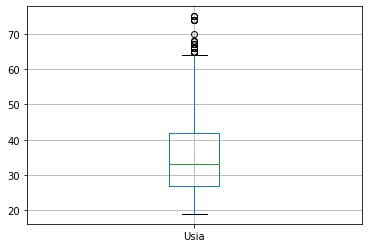

In [98]:
df.boxplot(column=['Usia'])

## Latihan membuat Box Plot

In [99]:
# Latihan untuk boxplot variabel SLIK_Cicilan_Bulanan
# Tulis kode disini



In [100]:
# Latihan untuk boxplot variabel SLIK_Outstanding_CC
# Tulis kode disini



# Missing Data Treatment (Apa yang harus dilakukan terhadap data yang kosong?)

## 2.3.2.5.4.1 Imputasi baris data yang kosong dengan asumsi nilai


In [101]:
# Koding berikut menggantikan missing value dari semua variabel dengan
# nilai yang paling sering muncul (modus) untuk variabel kategori dan nilai rata-rata untuk variabel numerik

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

# Untuk variabel numerik, data yang kosong diganti dengan nilai rata-rata
for kolom in df_numerik.columns:
  df_numerik[kolom].fillna(df_numerik[kolom].mean(), inplace=True)

# Untuk variabel kategori, data yang kosong diganti dengan nilai modus
for kolom in df_kategori.columns:
  df_kategori[kolom].fillna(df_kategori[kolom].mode()[0], inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_1 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


## # 2.3.2.5.4.2 Tidak menggunakan baris data yang kosong (Drop Data)


In [102]:
# Menggunakan fungsi dropna() untuk menghapus semua baris yang memiliki data kosong
df_pembersihan_2 = df.dropna()

## 2.3.2.5.4.3 Tidak menggunakan kolom data yang kosong (Drop Variable)


In [103]:
# Menggunakan fungsi dropna(axis=’columns’) untuk menghapus kolom yang memiliki data kosong
df_pembersihan_3 = df.dropna(axis='columns')

## 2.3.2.5.4.4 Kategorikan data yang kosong (Flag)

In [104]:
# Koding berikut memberikan tanda flagging untuk baris data yang berisikan baris data kosong

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

for kolom in df_numerik.columns:
  # Membuat kolom baru untuk baris data yang kosong
  df_numerik[kolom+"_missing"] = df_numerik[kolom].isnull()
  df_numerik[kolom].fillna(0, inplace=True)

for kolom in df_kategori.columns:
  # Kolom kategori harus secara eksplisit menambahkan data kategori baru
  df_kategori[kolom] = df_kategori[kolom].cat.add_categories("00_Data_Kosong")
  df_kategori[kolom].fillna("00_Data_Kosong", inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_4 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [105]:
# Melanjutkan proses dengan asumsi bahwa baris data yang kosong tidak signifikan dan tidak akan
# terjadi baris data yang kosong lagi

df_clean = df_pembersihan_2

In [106]:
# Menghapus indeks dari data yang telah dibuang
# Langkah ini harus dilakukan karena penghapusan baris telah dilakukan, tapi indeks belum direset
# Pembaca dapat verifikasi perbedaan total indeks sebelum dan sesudah reset, dengan menggunakan info
# Jika reset tidak dilakukan, bisa terjadi kesalahan data di langkah-langkah berikutnya

df_clean = df_clean.reset_index(drop=True)

# Data Eksplorasi (Explanatory Data Analysis atau EDA)

## 2.3.2.5.5.1 EDA Analisa dasar variabel untuk gagal_bayar

In [107]:
# Untuk melihat frekuensi dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts(normalize=True) * 100)

0_Bayar    670
1_Gagal    278
Name: gagal_bayar, dtype: int64
0_Bayar    70.675105
1_Gagal    29.324895
Name: gagal_bayar, dtype: float64


## 2.3.2.5.5.2 Exploratory Data Analysis untuk SLIK_Kolektabilitas


In [108]:
# Untuk melihat frekuensi dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts(normalize=True) * 100)

Kolek 3            483
Kolek 1            270
Kolek 2             84
Tidak_Ditemukan     49
Kolek 5             48
Kolek 4             14
Name: SLIK_Kolektibilitas, dtype: int64
Kolek 3            50.949367
Kolek 1            28.481013
Kolek 2             8.860759
Tidak_Ditemukan     5.168776
Kolek 5             5.063291
Kolek 4             1.476793
Name: SLIK_Kolektibilitas, dtype: float64


In [109]:
# Berapa banyak yang gagal bayar dari masing-masing nilai SLIK Kolektabilitas
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']))

# dalam proporsi persentase
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'],df_clean['gagal_bayar'],normalize='index',)*100)

gagal_bayar          0_Bayar  1_Gagal
SLIK_Kolektibilitas                  
Kolek 1                  229       41
Kolek 2                   58       26
Kolek 3                  333      150
Kolek 4                    6        8
Kolek 5                   21       27
Tidak_Ditemukan           23       26
gagal_bayar            0_Bayar    1_Gagal
SLIK_Kolektibilitas                      
Kolek 1              84.814815  15.185185
Kolek 2              69.047619  30.952381
Kolek 3              68.944099  31.055901
Kolek 4              42.857143  57.142857
Kolek 5              43.750000  56.250000
Tidak_Ditemukan      46.938776  53.061224


## 2.3.2.5.5.2 SLIK_Kolektibilitas Data Visualisasi

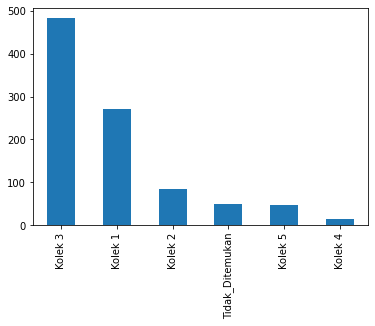

In [110]:
# Fungsi value_counts().plot(kind='bar')
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='bar')

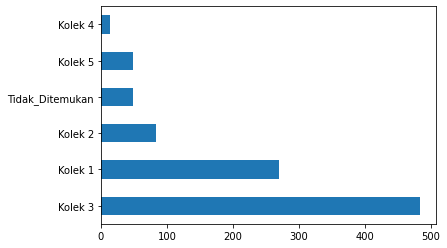

In [111]:
# Menampilkan plot bar secara horizontal
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='barh')

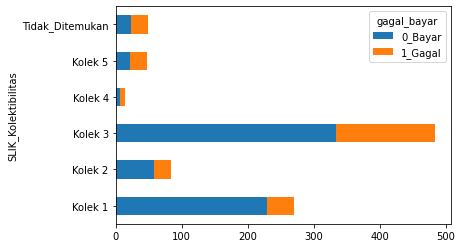

In [112]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']).plot(kind='barh', stacked=True)

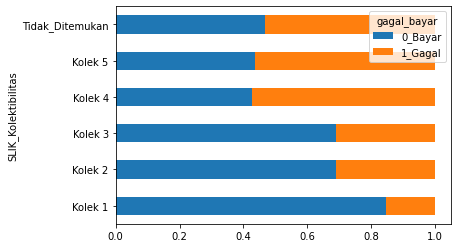

In [113]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar, secara proporsi
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar'], normalize='index').plot(kind='barh', stacked=True)

## Latihan EDA untuk variabel kategori

In [114]:
# Latihan EDA untuk Tujuan_Pinjaman, Lama_Bekerja, atau variabel kategori / teks lainnya
# Tulis kode disini



## 2.3.2.5.5.3 Exploratory Data Analysis untuk Usia

In [115]:
# Rangkuman statistik untuk variabel numerik Usia
print(df_clean['Usia'].describe())

# Rangkuman statistik untuk variabel numerik Usia, berdasarkan default (gagal bayar atau tidak)
df_clean.groupby('gagal_bayar')['Usia'].describe()

count    948.000000
mean      35.548523
std       11.335750
min       19.000000
25%       27.000000
50%       33.000000
75%       42.000000
max       75.000000
Name: Usia, dtype: float64


,count,mean,std,min,25%,50%,75%,max
gagal_bayar,,,,,,,,
0_Bayar,670.0,36.116418,11.239140,19.0,27.0,34.0,42.00,75.0
1_Gagal,278.0,34.179856,11.470415,19.0,25.0,31.0,40.75,74.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

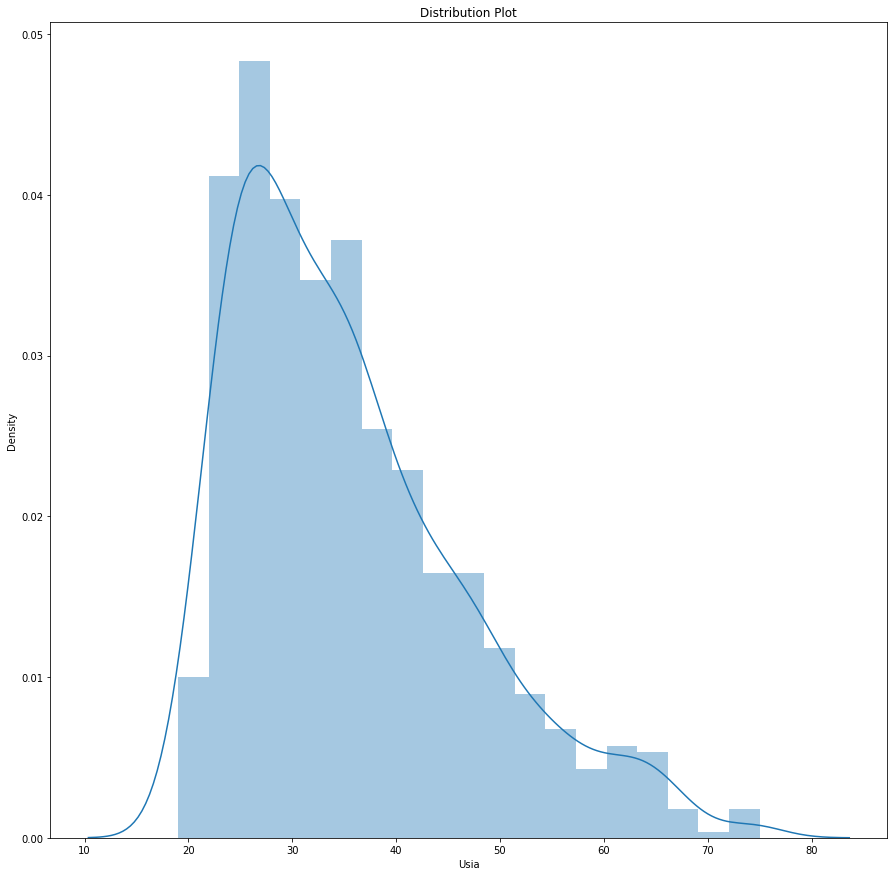

In [116]:
# Fungsi distplot() dari library seaborn
# Perhatikan bahwa distribusi plot harus tidak memiliki data kosong / missing value.
# Oleh karena itu harus menambahkan fungsi dropna() untuk secara sementara tidak
# mengikutsertakan missing value dalam pembuatan plot distribusi

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
sns.distplot(df_clean['Usia'].dropna(), ax=ax).set_title('Distribution Plot')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


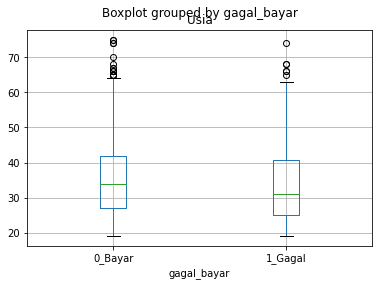

In [117]:
# Menambahkan by di fungsi boxplot untuk membagi boxplot berdasarkan gagal_bayar
df_clean.boxplot(by='gagal_bayar',column=['Usia'])

## Latihan EDA untuk variabel Numerik

In [118]:
# Latihan untuk rangkuman analisa dan visualisasi untuk variabel SLIK_Cicilan_Bulanan, SLIK_Outstanding_CC, Lama_Cicilan, dan Jumlah_Pinjaman
# Tulis kode disini



## Korelasi

In [119]:
import numpy as np

# Untuk dapat melakukan analisa statistik, harus mengubah variabel gagal_bayar dari string menjadi angka (integer)
# Mengubah target variabel gagal_bayar menjadi angka 0 dan 1
conditions = [
             df_clean['gagal_bayar'] == '1_Gagal', 
             df_clean['gagal_bayar'] == '0_Bayar'
             ]

choices     = [
             1,
             0
             ]
df_clean['default'] = np.select(conditions,choices, default = 0)

In [120]:
# Menghitung korelasi antara variabel Usia dengan default
print(df_clean['default'].corr(df_clean['Usia']))

-0.0778147171989035


In [121]:
from scipy import stats

# Uji coba hipotesis apakah ada perbedaan nilai rata-rata variabel 
# Usia dengan default (gagal bayar dan tidak gagal bayar)
stats.ttest_ind( df_clean[df_clean.default == 0].Usia,
             	df_clean[df_clean.default == 1].Usia, nan_policy='omit')

Ttest_indResult(statistic=2.400635164816287, pvalue=0.016558910387081596)

## 2.3.2.5.6 Memahami korelasi antar variabel dan dengan target

In [122]:
# Korelasi Antar semua Variabel numerik
import seaborn as sns
corr = df_clean.corr()
corr

,Lama_Cicilan,Jumlah_Pinjaman,Usia,SLIK_Cicilan_Bulanan,SLIK_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Apps_Installed,default
Lama_Cicilan,1.000000,0.298788,0.029419,0.000481,0.029004,-0.012322,-0.028463,-0.057698,0.021000
Jumlah_Pinjaman,0.298788,1.000000,0.041210,-0.031538,-0.007841,0.013080,-0.020965,-0.026660,0.132585
Usia,0.029419,0.041210,1.000000,0.007345,-0.008791,0.018705,0.018308,0.032119,-0.077815
SLIK_Cicilan_Bulanan,0.000481,-0.031538,0.007345,1.000000,0.317872,0.034330,-0.056521,-0.003362,0.181373
SLIK_Outstanding_CC,0.029004,-0.007841,-0.008791,0.317872,1.000000,-0.035197,-0.004624,-0.054377,0.185339
API_CreditScore_Vendor_A,-0.012322,0.013080,0.018705,0.034330,-0.035197,1.000000,-0.000716,0.040767,-0.038087
API_CreditScore_Vendor_B,-0.028463,-0.020965,0.018308,-0.056521,-0.004624,-0.000716,1.000000,-0.018533,-0.160338
Device_Apps_Installed,-0.057698,-0.026660,0.032119,-0.003362,-0.054377,0.040767,-0.018533,1.000000,-0.132190
default,0.021000,0.132585,-0.077815,0.181373,0.185339,-0.038087,-0.160338,-0.132190,1.000000


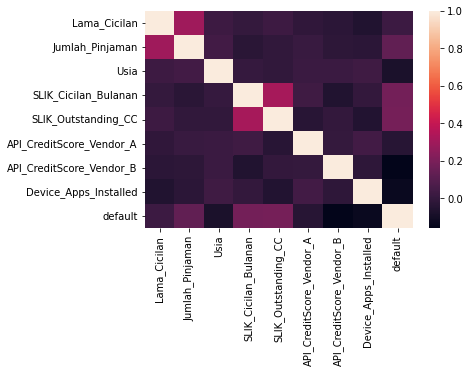

In [123]:
# Korelasi secara visualisasi
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Latihan Korelasi

In [124]:
# Latihan untuk korelasi untuk variabel API_CreditScore_Vendor_A dan Lama_Cicilan
# Tulis kode disini
# Kesimpulan yang didapatkan?


In [125]:
# Latihan uji coba hipotesis untuk API_CreditScore_Vendor_A dan Lama_Cicilan
# Tulis kode disini
# Kesimpulan yang didapatkan?



## 2.3.2.5.6.2 Memahami korelasi antar variabel independent kategori


In [126]:
# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df_clean.select_dtypes(include=['float64','int64','int'])
df_kategori = df_clean.select_dtypes(exclude = ['float64','int64','int'])

# Menghapus kolom yang tidak berkaitan dengan korelasi antar variabel independent
df_kategori.drop(columns=['ID', 'gagal_bayar'], inplace=True)

from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.get_dummies(data = df_kategori)

# Kode Python berdasarkan referensi dari https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
resultant.to_csv('chi_square.csv') 
files.download('chi_square.csv')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                                            Tujuan_Pinjaman_buka_bisnis  ...  Email_Domain_Type_Public_Domain
Tujuan_Pinjaman_buka_bisnis                                0.000000e+00  ...                     4.236873e-04
Tujuan_Pinjaman_elektronik                                 3.736414e-22  ...                     8.344980e-04
Tujuan_Pinjaman_liburan                                    1.432841e-05  ...                     7.020366e-02
Tujuan_Pinjaman_makanan                                    1.027722e-06  ...                     2.353050e-01
Tujuan_Pinjaman_pendidikan                                 3.761034e-05  ...                     3.820163e-01
...                                                                 ...  ...                              ...
Mobile_Number_Active_Since_3_1_ke_2_tahun                  5.577441e-01  ...                     1.663092e-01
Mobile_Number_Active_Since_4_2_ke_5_tahun                  1.438647e-01  ...                     2.431699e-01
Mobile_Num

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2.3.2.5.7.3 Penggunaan WOE dan IV dalam Scorecard


In [127]:
# Reference https://stackoverflow.com/questions/60892714/how-to-get-the-weight-of-evidence-woe-and-information-value-iv-in-python-pan

df_woe_iv = (pd.crosstab(df_clean['SLIK_Kolektibilitas'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

default                     0         1       woe        iv
SLIK_Kolektibilitas                                        
Kolek 1              0.341791  0.147482 -0.840493  0.324213
Kolek 2              0.086567  0.093525  0.077310  0.324213
Kolek 3              0.497015  0.539568  0.082149  0.324213
Kolek 4              0.008955  0.028777  1.167339  0.324213
Kolek 5              0.031343  0.097122  1.130971  0.324213
Tidak_Ditemukan      0.034328  0.093525  1.002259  0.324213


In [128]:
# Variabel SLIK_Kolektibilitas

conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 1' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 2' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 3' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 4' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 5' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Tidak_Ditemukan' )
             ]

choices = [
          'Kolek 1',
          'Kolek 2&3',
          'Kolek 4&5',
          'Kolek Tidak_Ditemukan'
          ]

df_clean['SLIK_Kolektibilitas_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(df_clean['SLIK_Kolektibilitas_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['SLIK_Kolektibilitas_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 1' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 2' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 3' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 4' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 5' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Tidak_Ditemukan' )
             ]

choices = [
          -0.8405,
          0.0814,
          1.1392,
          1.0023
          ]

df_clean['SLIK_Kolektibilitas_WOE'] = np.select(conditions, choices)

Kolek 2&3                59.810127
Kolek 1                  28.481013
Kolek 4&5                 6.540084
Kolek Tidak_Ditemukan     5.168776
Name: SLIK_Kolektibilitas_Bin, dtype: float64
default                         0         1       woe        iv
SLIK_Kolektibilitas_Bin                                        
Kolek 1                  0.341791  0.147482 -0.840493  0.324191
Kolek 2&3                0.583582  0.633094  0.081433  0.324191
Kolek 4&5                0.040299  0.125899  1.139168  0.324191
Kolek Tidak_Ditemukan    0.034328  0.093525  1.002259  0.324191


In [129]:
# Variabel Usia dengan WOE dan IV yang belum dioptimumkan

conditions = [
             ( df_clean['Usia'] <= 23 ),
             ( df_clean['Usia'] >= 24 ) & ( df_clean['Usia'] <= 26),
             ( df_clean['Usia'] >= 27 ) & ( df_clean['Usia'] <= 28 ),
             ( df_clean['Usia'] >= 29 ) & ( df_clean['Usia'] <= 31 ),
             ( df_clean['Usia'] >= 32 ) & ( df_clean['Usia'] <= 34 ),
             ( df_clean['Usia'] >= 35 ) & ( df_clean['Usia'] <= 37 ),
             ( df_clean['Usia'] >= 38 ) & ( df_clean['Usia'] <= 42 ),
             ( df_clean['Usia'] >= 43 ) & ( df_clean['Usia'] <= 48 ),
             ( df_clean['Usia'] >= 49 ) & ( df_clean['Usia'] <= 55 ),
             ( df_clean['Usia'] >= 56 )
             ]

choices = [
          '01.<=23',
          '02.24-26',
          '03.27-28',
          '04.29-31',
          '05.32-34',
          '06.35-37',
          '07.38-42',
          '08.43-48',
          '09.49-55',
          '10.>=56'
          ]
df_clean['Usia_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(df_clean['Usia_Bin'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Usia_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Usia_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

02.24-26    13.924051
07.38-42    11.392405
04.29-31    11.181435
06.35-37    10.654008
01.<=23     10.548523
08.43-48     9.704641
05.32-34     9.704641
03.27-28     9.071730
10.>=56      6.962025
09.49-55     6.856540
Name: Usia_Bin, dtype: float64
default    0   1
Usia_Bin        
01.<=23   60  40
02.24-26  82  50
03.27-28  62  24
04.29-31  75  31
05.32-34  63  29
06.35-37  83  18
07.38-42  80  28
08.43-48  68  24
09.49-55  50  15
10.>=56   47  19
default          0         1       woe        iv
Usia_Bin                                        
01.<=23   0.089552  0.143885  0.474191  0.100136
02.24-26  0.122388  0.179856  0.384960  0.100136
03.27-28  0.092537  0.086331 -0.069424  0.100136
04.29-31  0.111940  0.111511 -0.003844  0.100136
05.32-34  0.094030  0.104317  0.103818  0.100136
06.35-37  0.123881  0.064748 -0.648812  0.100136
07.38-42  0.119403  0.100719 -0.170166  0.100136
08.43-48  0.101493  0.086331 -0.161797  0.100136
09.49-55  0.074627  0.053957 -0.324316  0.100136
10.>=5

In [130]:
# Variabel Usia dengan WOE dan IV yang dioptimumkan

conditions = [
             ( df_clean['Usia'] <= 23 ),
             ( df_clean['Usia'] >= 24 ) & ( df_clean['Usia'] <= 34),
             ( df_clean['Usia'] >= 35 ) & ( df_clean['Usia'] <= 55 ),
             ( df_clean['Usia'] >= 56 )
             ]

choices = [
          '1.<=23',
          '2.24-34',
          '3.35-55',
          '4.>=56'
          ]
df_clean['Usia_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(df_clean['Usia_Bin'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Usia_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Usia_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Usia'] <= 23 ),
             ( df_clean['Usia'] >= 24 ) & ( df_clean['Usia'] <= 34),
             ( df_clean['Usia'] >= 35 ) & ( df_clean['Usia'] <= 55 ),
             ( df_clean['Usia'] >= 56 )
             ]

choices = [
          0.474191,
          0.135589,
          -0.316047,
          -0.026052
          ]
df_clean['Usia_WOE'] = np.select(conditions, choices)

2.24-34    43.881857
3.35-55    38.607595
1.<=23     10.548523
4.>=56      6.962025
Name: Usia_Bin, dtype: float64
default     0    1
Usia_Bin          
1.<=23     60   40
2.24-34   282  134
3.35-55   281   85
4.>=56     47   19
default          0         1       woe        iv
Usia_Bin                                        
1.<=23    0.089552  0.143885  0.474191  0.070016
2.24-34   0.420896  0.482014  0.135589  0.070016
3.35-55   0.419403  0.305755 -0.316047  0.070016
4.>=56    0.070149  0.068345 -0.026052  0.070016


# Pembuatan WOE untuk variabel lainnya

In [131]:
# Variabel Tujuan_Pinjaman

# Untuk melihat proporsi (dalam persentase) dari variabel Tujuan_Pinjaman
print(df_clean['Tujuan_Pinjaman'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Tujuan_Pinjaman'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( (df_clean['Tujuan_Pinjaman'] == 'pendidikan') ), 
             ( df_clean['Tujuan_Pinjaman'] == 'buka_bisnis' ),
             ( (df_clean['Tujuan_Pinjaman'] == 'liburan') ),
             ( (df_clean['Tujuan_Pinjaman'] == 'elektronik')   ), 
             ( df_clean['Tujuan_Pinjaman'] == 'peralatan_rumahtangga' ),
             ( df_clean['Tujuan_Pinjaman'] == 'makanan' )
             ]

choices = [
          '1.pendidikan',
          '2.buka_bisnis',
          '3.liburan',
          '4.elektronik',
          '5.peralatan_rumahtangga',
          '6.makanan'
          ]
df_clean['Tujuan_Pinjaman_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Tujuan_Pinjaman_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Tujuan_Pinjaman_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( (df_clean['Tujuan_Pinjaman'] == 'pendidikan') ), 
             ( df_clean['Tujuan_Pinjaman'] == 'buka_bisnis' ),
             ( (df_clean['Tujuan_Pinjaman'] == 'liburan') ),
             ( (df_clean['Tujuan_Pinjaman'] == 'elektronik')   ), 
             ( df_clean['Tujuan_Pinjaman'] == 'peralatan_rumahtangga' ),
             ( df_clean['Tujuan_Pinjaman'] == 'makanan' )
             ]

choices = [
          -0.8,
          -0.5,
          -0.3,
          0.4,
          0.5,
          0.8
          ]
df_clean['Tujuan_Pinjaman_WOE'] = np.select(conditions, choices)


elektronik               43.037975
buka_bisnis              18.670886
makanan                  10.970464
peralatan_rumahtangga    10.864979
liburan                   8.649789
pendidikan                7.805907
Name: Tujuan_Pinjaman, dtype: float64
default                       0         1       woe        iv
Tujuan_Pinjaman                                              
buka_bisnis            0.200000  0.154676 -0.256983  0.068185
elektronik             0.425373  0.442446  0.039352  0.068185
liburan                0.089552  0.079137 -0.123646  0.068185
makanan                0.092537  0.151079  0.490192  0.068185
pendidikan             0.089552  0.050360 -0.575631  0.068185
peralatan_rumahtangga  0.102985  0.122302  0.171911  0.068185
default                    0    1
Tujuan_Pinjaman_Bin              
1.pendidikan              60   14
2.buka_bisnis            134   43
3.liburan                 60   22
4.elektronik             285  123
5.peralatan_rumahtangga   69   34
6.makanan         

In [132]:
# Variabel API_CreditScore_Vendor_A

conditions = [
             ( df_clean['API_CreditScore_Vendor_A'] <= 250 ), 
             ( df_clean['API_CreditScore_Vendor_A'] <= 750 ),
             ( df_clean['API_CreditScore_Vendor_A'] > 750 )
             ]

choices = [
          '01.0-250',
          '02.250-750',
          '03.>750'
          ]
df_clean['API_CreditScore_Vendor_A_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['API_CreditScore_Vendor_A_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['API_CreditScore_Vendor_A_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['API_CreditScore_Vendor_A_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['API_CreditScore_Vendor_A'] <= 250 ), 
             ( df_clean['API_CreditScore_Vendor_A'] <= 750 ),
             ( df_clean['API_CreditScore_Vendor_A'] > 750 )
             ]

choices = [
          0.137238,
          -0.026325,
          -0.315583
          ]
df_clean['API_CreditScore_Vendor_A_WOE'] = np.select(conditions, choices)

default                         0    1
API_CreditScore_Vendor_A_Bin          
01.0-250                      208   99
02.250-750                    386  156
03.>750                        76   23
02.250-750    57.172996
01.0-250      32.383966
03.>750       10.443038
Name: API_CreditScore_Vendor_A_Bin, dtype: float64
default                              0         1       woe        iv
API_CreditScore_Vendor_A_Bin                                        
01.0-250                      0.310448  0.356115  0.137238  0.016349
02.250-750                    0.576119  0.561151 -0.026325  0.016349
03.>750                       0.113433  0.082734 -0.315583  0.016349


In [133]:
# Variabel Lama_Cicilan

# Untuk melihat proporsi (dalam persentase) dari variabel Lama_Cicilan
print(df_clean['Lama_Cicilan'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Lama_Cicilan'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Lama_Cicilan'] == 1 ), 
             ( df_clean['Lama_Cicilan'] == 2 ), 
             ( df_clean['Lama_Cicilan'] == 3 ), 
             ( df_clean['Lama_Cicilan'] == 4 ), 
             ( df_clean['Lama_Cicilan'] == 5 ), 
             ( df_clean['Lama_Cicilan'] == 6 )
             ]

choices = [
          '1_bulan',
          '2_bulan',
          '3_bulan',
          '4_bulan',
          '5_bulan',
          '6_bulan'
          ]
df_clean['Lama_Cicilan_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Lama_Cicilan_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Lama_Cicilan_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['Lama_Cicilan'] == 1 ), 
             ( df_clean['Lama_Cicilan'] == 2 ), 
             ( df_clean['Lama_Cicilan'] == 3 ), 
             ( df_clean['Lama_Cicilan'] == 4 ), 
             ( df_clean['Lama_Cicilan'] == 5 ), 
             ( df_clean['Lama_Cicilan'] == 6 )
             ]

choices = [
          0.261630,
          -0.610435,
          -0.094903,
          -0.564457,
          -0.357106,
          0.348352
          ]
df_clean['Lama_Cicilan_WOE'] = np.select(conditions, choices)

6.0    24.789030
3.0    23.101266
1.0    22.890295
4.0    11.603376
2.0     9.177215
5.0     8.438819
Name: Lama_Cicilan, dtype: float64
default              0         1       woe        iv
Lama_Cicilan                                        
1.0           0.210448  0.273381  0.261630  0.122392
2.0           0.105970  0.057554 -0.610435  0.122392
3.0           0.237313  0.215827 -0.094903  0.122392
4.0           0.132836  0.075540 -0.564457  0.122392
5.0           0.092537  0.064748 -0.357106  0.122392
6.0           0.220896  0.312950  0.348352  0.122392
default             0   1
Lama_Cicilan_Bin         
1_bulan           141  76
2_bulan            71  16
3_bulan           159  60
4_bulan            89  21
5_bulan            62  18
6_bulan           148  87
default                  0         1       woe        iv
Lama_Cicilan_Bin                                        
1_bulan           0.210448  0.273381  0.261630  0.122392
2_bulan           0.105970  0.057554 -0.610435  0.122392
3_b

In [134]:
# Variabel Device_Apps_Segmentation

# Untuk melihat proporsi (dalam persentase) dari variabel Device_Apps_Segmentation
print(df_clean['Device_Apps_Segmentation'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Device_Apps_Segmentation'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Device_Apps_Segmentation'] == 'Productivity' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Social_Media' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Shopping' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Games' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Online_Lending' )
             ]

choices = [
          'Productivity',
          'Social_Media',
          'Shopping',
          'Games',
          'Online_Lending'
          ]
df_clean['Device_Apps_Segmentation_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Device_Apps_Segmentation_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Device_Apps_Segmentation_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['Device_Apps_Segmentation'] == 'Productivity' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Social_Media' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Shopping' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Games' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Online_Lending' )
             ]

choices = [
          -0.384035,
          -0.044447,
          -0.280831,
          0.141253,
          0.711034
          ]
df_clean['Device_Apps_Segmentation_WOE'] = np.select(conditions, choices)

Social_Media      37.869198
Shopping          20.780591
Games             17.616034
Productivity      12.447257
Online_Lending    11.286920
Name: Device_Apps_Segmentation, dtype: float64
default                          0         1       woe       iv
Device_Apps_Segmentation                                       
Games                     0.168657  0.194245  0.141253  0.10034
Online_Lending            0.086567  0.176259  0.711034  0.10034
Productivity              0.137313  0.093525 -0.384035  0.10034
Shopping                  0.223881  0.169065 -0.280831  0.10034
Social_Media              0.383582  0.366906 -0.044447  0.10034
default                         0    1
Device_Apps_Segmentation_Bin          
Games                         113   54
Online_Lending                 58   49
Productivity                   92   26
Shopping                      150   47
Social_Media                  257  102
default                              0         1       woe       iv
Device_Apps_Segmentation

In [135]:
# Variabel API_CreditScore_Vendor_B

conditions = [
             ( df_clean['API_CreditScore_Vendor_B'] <= 100 ),
             ( df_clean['API_CreditScore_Vendor_B'] <= 175 ),
             ( df_clean['API_CreditScore_Vendor_B'] <= 225 ),
             ( df_clean['API_CreditScore_Vendor_B'] <= 299 ),
             ( df_clean['API_CreditScore_Vendor_B'] > 299 )
             ]

choices = [
          '1.0-100',
          '2.101-175',
          '3.176-225',
          '4.226-299',
          '5.>299'
          ]
df_clean['API_CreditScore_Vendor_B_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['API_CreditScore_Vendor_B_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['API_CreditScore_Vendor_B_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['API_CreditScore_Vendor_B_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['API_CreditScore_Vendor_B'] <= 100 ),
             ( df_clean['API_CreditScore_Vendor_B'] <= 175 ),
             ( df_clean['API_CreditScore_Vendor_B'] <= 225 ),
             ( df_clean['API_CreditScore_Vendor_B'] <= 299 ),
             ( df_clean['API_CreditScore_Vendor_B'] > 299 )
             ]

choices = [
          0.290050,
          0.218945,
          0.148043,
          0.123331,
          -2.850045
          ]
df_clean['API_CreditScore_Vendor_B_WOE'] = np.select(conditions, choices)

default                         0   1
API_CreditScore_Vendor_B_Bin         
1.0-100                       110  61
2.101-175                     182  94
3.176-225                     106  51
4.226-299                     147  69
5.>299                        125   3
2.101-175    29.113924
4.226-299    22.784810
1.0-100      18.037975
3.176-225    16.561181
5.>299       13.502110
Name: API_CreditScore_Vendor_B_Bin, dtype: float64
default                              0         1       woe        iv
API_CreditScore_Vendor_B_Bin                                        
1.0-100                       0.164179  0.219424  0.290050  0.538839
2.101-175                     0.271642  0.338129  0.218945  0.538839
3.176-225                     0.158209  0.183453  0.148043  0.538839
4.226-299                     0.219403  0.248201  0.123331  0.538839
5.>299                        0.186567  0.010791 -2.850045  0.538839


In [136]:
# Variabel Mobile_Provider

# Untuk melihat proporsi (dalam persentase) dari variabel Device_Apps_Segmentation
print(df_clean['Mobile_Provider'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Mobile_Provider'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Mobile_Provider'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Mobile_Provider'] == 'Telco_A' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_B' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_C' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_D' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_E' )
             ]

choices = [
          'Telco_A',
          'Telco_B',
          'Telco_C',
          'Telco_D',
          'Telco_E'
          ]
df_clean['Mobile_Provider_Bin'] = np.select(conditions, choices)


conditions = [
             ( df_clean['Mobile_Provider'] == 'Telco_A' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_B' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_C' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_D' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_E' )
             ]

choices = [
          -0.434317,
          -0.059624,
          -0.171553,
          0.389450,
          0.995488
          ]
df_clean['Mobile_Provider_WOE'] = np.select(conditions, choices)

Telco_A    42.827004
Telco_B    16.139241
Telco_C    14.662447
Telco_D    13.607595
Telco_E    12.763713
Name: Mobile_Provider, dtype: float64
default            0   1
Mobile_Provider         
Telco_A          320  86
Telco_B          110  43
Telco_C          103  36
Telco_D           80  49
Telco_E           57  64
default                 0         1       woe        iv
Mobile_Provider                                        
Telco_A          0.477612  0.309353 -0.434317  0.244431
Telco_B          0.164179  0.154676 -0.059624  0.244431
Telco_C          0.153731  0.129496 -0.171553  0.244431
Telco_D          0.119403  0.176259  0.389450  0.244431
Telco_E          0.085075  0.230216  0.995488  0.244431


In [137]:
# Variabel Device_Apps_Installed

conditions = [
             ( df_clean['Device_Apps_Installed'] <= 5 ),
             ( df_clean['Device_Apps_Installed'] <= 10 ),
             ( df_clean['Device_Apps_Installed'] <= 15 ),
             ( df_clean['Device_Apps_Installed'] <= 20 ),
             ( df_clean['Device_Apps_Installed'] <= 30 ),
             ( df_clean['Device_Apps_Installed'] > 30 )
             ]

choices = [
          '1.0-5',
          '2.5-10',
          '3.10-15',
          '4.15-20',
          '5.20-30',
          '6.>30'
          ]
df_clean['Device_Apps_Installed_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Device_Apps_Installed_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['Device_Apps_Installed_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Device_Apps_Installed_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['Device_Apps_Installed'] <= 5 ),
             ( df_clean['Device_Apps_Installed'] <= 10 ),
             ( df_clean['Device_Apps_Installed'] <= 15 ),
             ( df_clean['Device_Apps_Installed'] <= 20 ),
             ( df_clean['Device_Apps_Installed'] <= 30 ),
             ( df_clean['Device_Apps_Installed'] > 30 )
             ]

choices = [
          0.583391,
          0.234828,
          0.195478,
          -0.057468,
          -0.104180,
          -0.781075
          ]
df_clean['Device_Apps_Installed_WOE'] = np.select(conditions, choices)

default                      0   1
Device_Apps_Installed_Bin         
1.0-5                       39  29
2.5-10                     101  53
3.10-15                    111  56
4.15-20                     97  38
5.20-30                    222  83
6.>30                      100  19
5.20-30    32.172996
3.10-15    17.616034
2.5-10     16.244726
4.15-20    14.240506
6.>30      12.552743
1.0-5       7.172996
Name: Device_Apps_Installed_Bin, dtype: float64
default                           0         1       woe        iv
Device_Apps_Installed_Bin                                        
1.0-5                      0.058209  0.104317  0.583391  0.110336
2.5-10                     0.150746  0.190647  0.234828  0.110336
3.10-15                    0.165672  0.201439  0.195478  0.110336
4.15-20                    0.144776  0.136691 -0.057468  0.110336
5.20-30                    0.331343  0.298561 -0.104180  0.110336
6.>30                      0.149254  0.068345 -0.781075  0.110336


In [138]:
# Variabel Device_Active_Since

# Untuk melihat proporsi (dalam persentase) dari variabel Device_Active_Since
print(df_clean['Device_Active_Since'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Device_Active_Since'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Device_Active_Since'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Device_Active_Since'] == '1_Kurang_1_tahun' ), 
             ( df_clean['Device_Active_Since'] == '2_1_ke_3_tahun' ), 
             ( df_clean['Device_Active_Since'] == '3_Lebih_3_tahun' )
             ]

choices = [
          '1_Kurang_1_tahun',
          '2_1_ke_3_tahun',
          '3_Lebih_3_tahun'
          ]
df_clean['Device_Active_Since_Bin'] = np.select(conditions, choices)


conditions = [
             ( df_clean['Device_Active_Since'] == '1_Kurang_1_tahun' ), 
             ( df_clean['Device_Active_Since'] == '2_1_ke_3_tahun' ), 
             ( df_clean['Device_Active_Since'] == '3_Lebih_3_tahun' )
             ]

choices = [
          -0.041500,
          -0.124465,
          0.169268
          ]
df_clean['Device_Active_Since_WOE'] = np.select(conditions, choices)


2_1_ke_3_tahun      47.995781
3_Lebih_3_tahun     36.814346
1_Kurang_1_tahun    15.189873
Name: Device_Active_Since, dtype: float64
default                0    1
Device_Active_Since          
1_Kurang_1_tahun     103   41
2_1_ke_3_tahun       333  122
3_Lebih_3_tahun      234  115
default                     0         1       woe        iv
Device_Active_Since                                        
1_Kurang_1_tahun     0.153731  0.147482 -0.041500  0.018402
2_1_ke_3_tahun       0.497015  0.438849 -0.124465  0.018402
3_Lebih_3_tahun      0.349254  0.413669  0.169268  0.018402


In [139]:
# Variabel Mobile_Number_Active_Since

# Untuk melihat proporsi (dalam persentase) dari variabel Device_Active_Since
print(df_clean['Mobile_Number_Active_Since'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Mobile_Number_Active_Since'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Mobile_Number_Active_Since'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Mobile_Number_Active_Since'] == '1_Kurang_1_bulan' ), 
             ( df_clean['Mobile_Number_Active_Since'] == '2_Kurang_1_tahun' ), 
             ( df_clean['Mobile_Number_Active_Since'] == '3_1_ke_2_tahun' ),
             ( df_clean['Mobile_Number_Active_Since'] == '4_2_ke_5_tahun' ),
             ( df_clean['Mobile_Number_Active_Since'] == '5_Lebih_5_tahun' )
             ]

choices = [
          '1_Kurang_1_bulan',
          '2_Kurang_1_tahun',
          '3_1_ke_2_tahun',
          '4_2_ke_5_tahun',
          '5_Lebih_5_tahun',
          ]
df_clean['Mobile_Number_Active_Since_Bin'] = np.select(conditions, choices)


conditions = [
             ( df_clean['Mobile_Number_Active_Since'] == '1_Kurang_1_bulan' ), 
             ( df_clean['Mobile_Number_Active_Since'] == '2_Kurang_1_tahun' ), 
             ( df_clean['Mobile_Number_Active_Since'] == '3_1_ke_2_tahun' ),
             ( df_clean['Mobile_Number_Active_Since'] == '4_2_ke_5_tahun' ),
             ( df_clean['Mobile_Number_Active_Since'] == '5_Lebih_5_tahun' )
             ]

choices = [
          0.407297,
          0.238695,
          -0.074022,
          -0.362057,
          -0.624421
          ]
df_clean['Mobile_Number_Active_Since_WOE'] = np.select(conditions, choices)

1_Kurang_1_bulan    29.113924
5_Lebih_5_tahun     18.565401
4_2_ke_5_tahun      18.354430
2_Kurang_1_tahun    18.037975
3_1_ke_2_tahun      15.928270
Name: Mobile_Number_Active_Since, dtype: float64
default                       0    1
Mobile_Number_Active_Since          
1_Kurang_1_bulan            170  106
2_Kurang_1_tahun            112   59
3_1_ke_2_tahun              109   42
4_2_ke_5_tahun              135   39
5_Lebih_5_tahun             144   32
default                            0         1       woe       iv
Mobile_Number_Active_Since                                       
1_Kurang_1_bulan            0.253731  0.381295  0.407297  0.14806
2_Kurang_1_tahun            0.167164  0.212230  0.238695  0.14806
3_1_ke_2_tahun              0.162687  0.151079 -0.074022  0.14806
4_2_ke_5_tahun              0.201493  0.140288 -0.362057  0.14806
5_Lebih_5_tahun             0.214925  0.115108 -0.624421  0.14806


## 2.3.3.1.1 Variabel Debt Burden Ratio (DBR)

In [140]:
conditions = [
             ( df_clean['Pendapatan_perbulan'] == '1. < 1 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '2. 1 - 5 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '3. 5 - 10 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '4. 10 - 20 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '5. >20 juta' )
             ]

choices = [
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 1000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 5000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 10000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 20000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 30000000 )
          ]
df_clean['DBR'] = np.select(conditions, choices)

## 2.3.3.1.2 Apakah alamat kantor dan rumah berdekatan?


In [141]:
conditions = [
             ( df_clean['Alamat_Rumah'] == df_clean['Alamat_Kantor'] ),
             ( df_clean['Alamat_Rumah'] != df_clean['Alamat_Kantor'] ),
             ]

choices = [
          '1.Rumah_Kantor_Dekat',
          '2.Rumah_Kantor_Jauh'
          ]
df_clean['Alamat_Rumah_Kantor'] = np.select(conditions, choices)

In [142]:
# Variabel DBR

conditions = [
             ( df_clean['DBR'] <= 0.00 ),
             ( df_clean['DBR'] <= 0.10 ),
             ( df_clean['DBR'] <= 0.20 ),
             ( df_clean['DBR'] <= 0.30 ),
             ( df_clean['DBR'] <= 0.40 ),
             ( df_clean['DBR'] <= 0.50 ),
             ( df_clean['DBR'] <= 0.60 ),
             ( df_clean['DBR'] > 0.60 )
             ]

choices = [
          '1.0%',
          '2.0-10%',
          '3.10-20%',
          '4.20-30%',
          '5.30-40%',
          '6.40-50%',
          '7.50-60%',
          '8.>60%',
          ]
df_clean['DBR_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['DBR_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['DBR_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['DBR_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['DBR'] <= 0.0 ),
             ( df_clean['DBR'] <= 0.1 ),
             ( df_clean['DBR'] <= 0.2 ),
             ( df_clean['DBR'] <= 0.3 ),
             ( df_clean['DBR'] <= 0.4 ),
             ( df_clean['DBR'] <= 0.5 ),
             ( df_clean['DBR'] <= 0.6 ),
             ( df_clean['DBR'] > 0.6 )
             ]

choices = [
          1.145360,
          -0.814122,
          -0.303039,
          -0.036634,
          -0.072352,
          0.062895,
          0.142058,
          0.728616,
          ]
df_clean['DBR_WOE'] = np.select(conditions, choices)

default     0   1
DBR_Bin          
1.0%       23  30
2.0-10%   272  50
3.10-20%   62  19
4.20-30%   60  24
5.30-40%   57  22
6.40-50%   43  19
7.50-60%   46  22
8.>60%    107  92
2.0-10%     33.966245
8.>60%      20.991561
4.20-30%     8.860759
3.10-20%     8.544304
5.30-40%     8.333333
7.50-60%     7.172996
6.40-50%     6.540084
1.0%         5.590717
Name: DBR_Bin, dtype: float64
default          0         1       woe        iv
DBR_Bin                                         
1.0%      0.034328  0.107914  1.145360  0.402759
2.0-10%   0.405970  0.179856 -0.814122  0.402759
3.10-20%  0.092537  0.068345 -0.303039  0.402759
4.20-30%  0.089552  0.086331 -0.036634  0.402759
5.30-40%  0.085075  0.079137 -0.072352  0.402759
6.40-50%  0.064179  0.068345  0.062895  0.402759
7.50-60%  0.068657  0.079137  0.142058  0.402759
8.>60%    0.159701  0.330935  0.728616  0.402759


In [143]:
# Variabel Alamat_Rumah_Kantor

conditions = [
             ( df_clean['Alamat_Rumah_Kantor'] == '1.Rumah_Kantor_Dekat' ),
             ( df_clean['Alamat_Rumah_Kantor'] == '2.Rumah_Kantor_Jauh' )
             ]

choices = [
          '1.Rumah_Kantor_Dekat',
          '2.Rumah_Kantor_Jauh'
          ]
df_clean['Alamat_Rumah_Kantor_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Alamat_Rumah_Kantor_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['Alamat_Rumah_Kantor_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Alamat_Rumah_Kantor_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['Alamat_Rumah_Kantor'] == '1.Rumah_Kantor_Dekat' ),
             ( df_clean['Alamat_Rumah_Kantor'] == '2.Rumah_Kantor_Jauh' )
             ]

choices = [
          -0.313143,
          0.092824
          ]
df_clean['Alamat_Rumah_Kantor_WOE'] = np.select(conditions, choices)

default                    0    1
Alamat_Rumah_Kantor_Bin          
1.Rumah_Kantor_Dekat     178   54
2.Rumah_Kantor_Jauh      492  224
2.Rumah_Kantor_Jauh     75.527426
1.Rumah_Kantor_Dekat    24.472574
Name: Alamat_Rumah_Kantor_Bin, dtype: float64
default                         0         1       woe        iv
Alamat_Rumah_Kantor_Bin                                        
1.Rumah_Kantor_Dekat     0.265672  0.194245 -0.313143  0.028997
2.Rumah_Kantor_Jauh      0.734328  0.805755  0.092824  0.028997


## Latihan membuat variabel baru usia dan status


In [144]:
# Latihan membuat variabel baru usia dan status
# Koding disini



## 2.3.3.2 Memilih variabel untuk pembuatan model

In [145]:
# Persiapan membuat model
# Memilih variabel yang akan diinput ke dalam model
# Contoh hanya menggunakan 3 variabel input saja: SLIK_Kolektibilitas, DBR, dan Usia

df_model_WOE = df_clean[['default','SLIK_Kolektibilitas_WOE','DBR_WOE','Usia_WOE']]
df_model_Bin = df_clean[['default','SLIK_Kolektibilitas_Bin','DBR_Bin','Usia_Bin']]
df_model = df_clean[['default','SLIK_Kolektibilitas','DBR','Usia']]

# Proses Modeling

In [146]:
# Dalam contoh ini tidak ada oversampling/undersampling

## 2.3.3.4 Membuat dataset training dan test


In [147]:
# Membagi dataset menjadi development(train) dan test

y = df_model_WOE.loc[:,'default']
X = df_model_WOE.loc[:,df_model_WOE.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

## 2.3.4.3.1 Penerapan regresi logistik di Python

In [148]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
lr.fit(X_train, y_train)

print('Coefficient: ', lr.feature_names_in_, lr.coef_)
print('Intercept: ', lr.intercept_)
print(lr.classes_)

# Jika ingin mengetahui detail dari regresi logistik
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
result = model.fit()

result.summary()

Coefficient:  ['SLIK_Kolektibilitas_WOE' 'DBR_WOE' 'Usia_WOE'] [[0.86139349 0.87926071 0.42979569]]
Intercept:  [-0.82758583]
[0 1]
Optimization terminated successfully.
         Current function value: 0.606180
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  663
Model:                          Logit   Df Residuals:                      660
Method:                           MLE   Df Model:                            2
Date:                Fri, 31 Dec 2021   Pseudo R-squ.:                0.003675
Time:                        09:10:15   Log-Likelihood:                -401.90
converged:                       True   LL-Null:                       -403.38
Covariance Type:            nonrobust   LLR p-value:                    0.2271
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
SLIK_Kolektibilitas_WOE     0.9444      0.159      5.928      0.000       0.632       1.257
DBR_WOE                     0.9797      0.138      7.084      0.000       0.709       1.251
Usia_WOE                    0.4661      0.324      1.438      0.150      -0.169       1.101
===========================================================================================
"""

In [149]:
train_predict = lr.predict(X_train)
test_predict = lr.predict(X_test)
print(test_predict)
# Cara adalah 0 jika bayar, dan 1 jika default

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [150]:
test_pred_proba = lr.predict_proba(X_test)
print(test_pred_proba)
# Cara bacanya adalah 0.635 adalah probabilitas 0 dan 0.364 adaalah probabilitas 1
# Dengan mengacu probabilitas 1 diatas 0.5 maka default / 1

[[0.76128807 0.23871193]
 [0.68196331 0.31803669]
 [0.47826863 0.52173137]
 [0.80812584 0.19187416]
 [0.68196331 0.31803669]
 [0.79712241 0.20287759]
 [0.70112653 0.29887347]
 [0.71616446 0.28383554]
 [0.63975174 0.36024826]
 [0.80455626 0.19544374]
 [0.88731536 0.11268464]
 [0.87586834 0.12413166]
 [0.69804444 0.30195556]
 [0.8332905  0.1667095 ]
 [0.76128807 0.23871193]
 [0.7806552  0.2193448 ]
 [0.74015595 0.25984405]
 [0.68196331 0.31803669]
 [0.56283126 0.43716874]
 [0.28760935 0.71239065]
 [0.80455626 0.19544374]
 [0.80455626 0.19544374]
 [0.24952739 0.75047261]
 [0.80455626 0.19544374]
 [0.68196331 0.31803669]
 [0.84808163 0.15191837]
 [0.74015595 0.25984405]
 [0.64241789 0.35758211]
 [0.83567593 0.16432407]
 [0.66976854 0.33023146]
 [0.68196331 0.31803669]
 [0.68317425 0.31682575]
 [0.24952739 0.75047261]
 [0.80455626 0.19544374]
 [0.91707466 0.08292534]
 [0.74015595 0.25984405]
 [0.63975174 0.36024826]
 [0.28760935 0.71239065]
 [0.80455626 0.19544374]
 [0.56283126 0.43716874]


In [151]:
# Bagaimana cara tahu bahwa model itu bagus atau tidak?
# Pembahasan di bagian evaluasi model
# koding nya adalah
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, test_predict))
conf_mat = confusion_matrix(y_true=y_test, y_pred=test_predict)
print('Confusion matrix:\n', conf_mat)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test, test_pred_proba[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85       204
           1       0.66      0.28      0.40        81

    accuracy                           0.75       285
   macro avg       0.71      0.61      0.62       285
weighted avg       0.74      0.75      0.72       285

Confusion matrix:
 [[192  12]
 [ 58  23]]
ROC Score: 0.7135378842895184


## Lampiran 6. Memilih variabel yang tepat dengan teknik stepwise

In [152]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

lr = LogisticRegression()
lr.fit(X_train, y_train)

feature_names = np.array(X.columns)

sfs_backward = SequentialFeatureSelector(
    lr, n_features_to_select=None, direction="backward"
).fit(X_train, y_train)

print(
    'Variabel signifikan stepwise backward: ', feature_names[sfs_backward.get_support()]
)

sfs_forward = SequentialFeatureSelector(
    lr, n_features_to_select=None, direction="forward"
).fit(X_train, y_train)

print(
    'Variabel signifikan stepwise forward: ', feature_names[sfs_forward.get_support()]
)

Variabel signifikan stepwise backward:  ['SLIK_Kolektibilitas_WOE']
Variabel signifikan stepwise forward:  ['SLIK_Kolektibilitas_WOE']


In [153]:
# Testing hasil stepwise

df_step = df_clean[['SLIK_Kolektibilitas_WOE','DBR_WOE','Usia_WOE','Mobile_Provider_WOE','Device_Apps_Installed_WOE'
                  ,'Mobile_Number_Active_Since_WOE','default'
                  ]]

# Membagi dataset menjadi development(train) dan test

y_step = df_step.loc[:,'default']
X_step = df_step.loc[:,df_step.columns != 'default']

from sklearn.model_selection import train_test_split
X_train_step, X_test_step, y_train_step, y_test_step = train_test_split(X_step, y_step, test_size=0.30, random_state=42)

lr_step = LogisticRegression()
lr_step.fit(X_train_step, y_train_step)

test_predict_step = lr_step.predict(X_test_step)
test_pred_proba_step = lr_step.predict_proba(X_test_step)

# Bagaimana cara tahu bahwa model itu bagus atau tidak?
# Pembahasan di bagian evaluasi model
# koding nya adalah
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test_step, test_predict_step))
conf_mat = confusion_matrix(y_true=y_test_step, y_pred=test_predict_step)
print('Confusion matrix:\n', conf_mat)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test_step, test_pred_proba_step[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86       204
           1       0.71      0.46      0.56        81

    accuracy                           0.79       285
   macro avg       0.76      0.69      0.71       285
weighted avg       0.78      0.79      0.78       285

Confusion matrix:
 [[189  15]
 [ 44  37]]
ROC Score: 0.7784132171387074


## 2.3.4.3.4 Penerapan metode score di Regresi Logistik

In [154]:
# Membuat scoring
P0 = 600 # Target Score
PDO = 50 # Target Odds
theta0 = 1/4 # Points double odds
B = PDO/np.log(2)
A = P0 + B * np.log(theta0)

In [155]:
# Perhitungan manual untuk data train
train_pred_proba = lr.predict_proba(X_train)[:,1]
score = A - B*np.log(train_pred_proba/(1-train_pred_proba))
df_train_pred_proba = pd.DataFrame(train_pred_proba, columns=['train_pred_proba'])
df_train_score = pd.DataFrame(score, columns=['Score'])
df_train_scoring_manual = pd.concat([df_train, df_train_pred_proba, df_train_score], axis = 1)

# Perhitungan manual untuk data test
test_pred_proba = lr.predict_proba(X_test)[:,1]
score = A - B*np.log(test_pred_proba/(1-test_pred_proba))
df_test_pred_proba = pd.DataFrame(test_pred_proba, columns=['test_pred_proba'])
df_test_score = pd.DataFrame(score, columns=['Score'])
df_test_scoring_manual = pd.concat([df_test, df_test_pred_proba, df_test_score], axis = 1)

In [156]:
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_train_scoring_manual.to_csv('df_train_scoring_manual.csv') 
files.download('df_train_scoring_manual.csv')

df_test_scoring_manual.to_csv('df_test_scoring_manual.csv') 
files.download('df_test_scoring_manual.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2.3.4.4 Cara cepat membuat scorecard di Python: Library Scorecardpy

### Instalasi library

In [157]:
# install scorecardpy
!pip install -q scorecardpy
#!pip install git+git://github.com/shichenxie/scorecardpy.git

### Persiapan Modeling, train dan test dataset, pembuatan binning dan EDA

In [158]:
# Persiapan pembuatan model untuk training dan test untuk scorecardpy
import scorecardpy as scpy

# Persiapan pembuatan model, membagi data menjadi data variabel independen dan variabel dependen
y = df_model.loc[:,'default']
X = df_model.loc[:,df_model.columns != 'default']

# Persiapan pembuatan model untuk training dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Mengubah dataset train dan test dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [159]:
# Seleksi variabel secara otomatis melalui scorecardpy
df_scorecardpy_selection = scpy.var_filter(df_model, y="default")
df_scorecardpy_selection.info()

[INFO] filtering variables ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   SLIK_Kolektibilitas  948 non-null    category
 1   Usia                 948 non-null    float64 
 2   default              948 non-null    int64   
dtypes: category(1), float64(1), int64(1)
memory usage: 16.1 KB


In [160]:
# Seleksi variabel secara otomatis melalui scorecardpy
df_scorecardpy_selection = scpy.var_filter(df_clean, y="default")
df_scorecardpy_selection.info()

[INFO] filtering variables ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Lama_Cicilan_WOE                948 non-null    float64 
 1   Pendapatan_perbulan             948 non-null    category
 2   Status                          948 non-null    category
 3   Kepemilikan_Rumah               948 non-null    category
 4   Device_Apps_Segmentation        948 non-null    category
 5   SLIK_Kolektibilitas_WOE         948 non-null    float64 
 6   Mobile_Provider_Bin             948 non-null    object  
 7   Device_Apps_Installed_WOE       948 non-null    float64 
 8   Lama_Cicilan                    948 non-null    float64 
 9   Usia_WOE                        948 non-null    float64 
 10  Device_Apps_Segmentation_WOE    948 non-null    float64 
 11  Device_Apps_Installed_Bin       948 non-null    objec

[INFO] creating woe binning ...


{'DBR': <Figure size 432x288 with 2 Axes>,
 'SLIK_Kolektibilitas': <Figure size 432x288 with 2 Axes>,
 'Usia': <Figure size 432x288 with 2 Axes>}

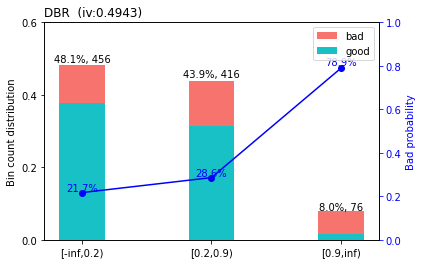

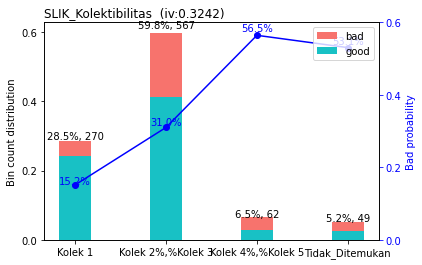

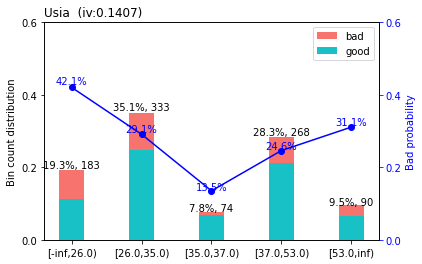

In [161]:
# Eksplorasi dataset dengan menggunakan Melakukan WOE binning
bins = scpy.woebin(df_model, y = 'default')
scpy.woebin_plot(bins)

[INFO] creating woe binning ...


{'DBR': <Figure size 432x288 with 2 Axes>,
 'SLIK_Kolektibilitas': <Figure size 432x288 with 2 Axes>,
 'Usia': <Figure size 432x288 with 2 Axes>}

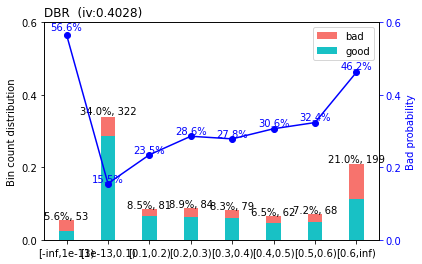

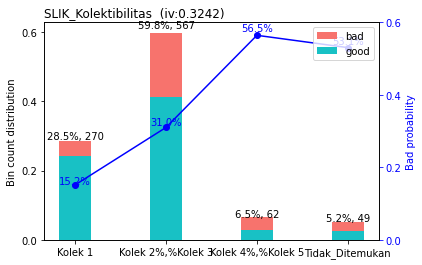

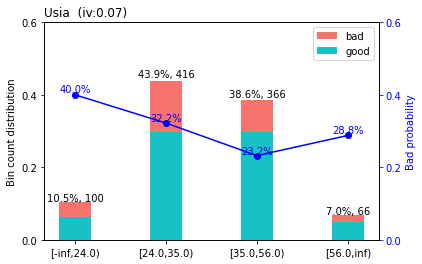

In [162]:
# Melakukan WOE binning dengan adjustment
breaks_adj = {
  'SLIK_Kolektibilitas': ['Kolek 1','Kolek 2%,%Kolek 3','Kolek 4%,%Kolek 5','Tidak_Ditemukan'],
  'DBR': [0.0000000000001,0.1,0.2,0.3,0.4,0.5,0.6],
  'Usia': [24,35,56]
}
bins_adj = scpy.woebin(df_model, y="default", breaks_list=breaks_adj)

scpy.woebin_plot(bins_adj)

In [163]:
# Pembuatan WOE
train = df_train
test = df_test

train_woe = scpy.woebin_ply(train, bins_adj)
test_woe = scpy.woebin_ply(test, bins_adj)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

print(X_train)
print(y_train)

[INFO] converting into woe values ...
[INFO] converting into woe values ...
      DBR_woe  Usia_woe  SLIK_Kolektibilitas_woe
0    1.145360  0.135589                 1.002259
1   -0.036634  0.474191                 0.081433
2   -0.072352  0.135589                 0.081433
3   -0.303039 -0.316047                -0.840493
4    1.145360  0.135589                 1.002259
..        ...       ...                      ...
658 -0.303039  0.135589                 0.081433
659  0.142058  0.135589                 0.081433
660 -0.814122  0.135589                 0.081433
661  0.062895  0.135589                 0.081433
662  0.728616 -0.316047                 1.139168

[663 rows x 3 columns]
0      0
1      0
2      0
3      0
4      1
      ..
658    0
659    1
660    0
661    0
662    1
Name: default, Length: 663, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [164]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('Coefficient: ', lr.feature_names_in_, lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficient:  ['DBR_woe' 'Usia_woe' 'SLIK_Kolektibilitas_woe'] [[0.87926751 0.42978425 0.86141653]]
Intercept:  [-0.82760233]


In [165]:
# Menerapkan hasil dari regresi logistik dan menghasilkan probabilitas
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# Pembuatan perhitungan scorecard
card = scpy.scorecard(bins_adj, lr, X_train.columns, points0=600, odds0=1/4, pdo=50, basepoints_eq0=False)
print(card)

# Menerapkan scorecard kepada setiap baris data
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

{'basepoints':      variable  bin  points
0  basepoints  NaN     560, 'DBR':   variable           bin  points
0      DBR  [-inf,1e-13)   -73.0
1      DBR   [1e-13,0.1)    52.0
2      DBR     [0.1,0.2)    19.0
3      DBR     [0.2,0.3)     2.0
4      DBR     [0.3,0.4)     5.0
5      DBR     [0.4,0.5)    -4.0
6      DBR     [0.5,0.6)    -9.0
7      DBR     [0.6,inf)   -46.0, 'Usia':    variable          bin  points
12     Usia  [-inf,24.0)   -15.0
13     Usia  [24.0,35.0)    -4.0
14     Usia  [35.0,56.0)    10.0
15     Usia   [56.0,inf)     1.0, 'SLIK_Kolektibilitas':                variable                bin  points
8   SLIK_Kolektibilitas            Kolek 1    52.0
9   SLIK_Kolektibilitas  Kolek 2%,%Kolek 3    -5.0
10  SLIK_Kolektibilitas  Kolek 4%,%Kolek 5   -71.0
11  SLIK_Kolektibilitas    Tidak_Ditemukan   -62.0}


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


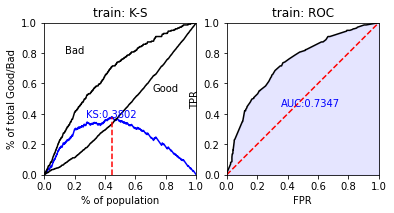

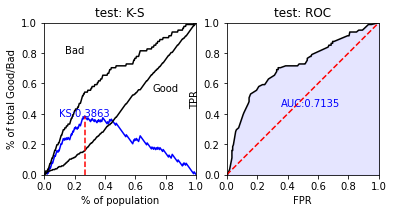

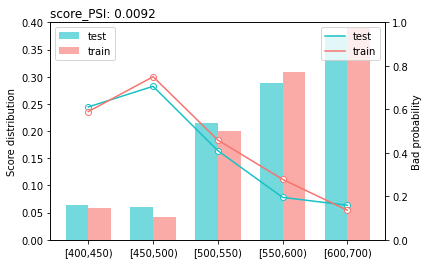

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.009231}

In [166]:
# evaluasi ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

## 2.3.5 Evaluasi

In [167]:
# Menerapkan hasil dari regresi logistik dan menghasilkan probabilitas
train_pred_proba = lr.predict_proba(X_train)[:,1]
test_pred_proba = lr.predict_proba(X_test)[:,1]

# Menerapkan hasil dari regresi logistik dan menghasilkan bayar (0) atau gagal (1)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

In [168]:
print(test_pred_proba)
print(test_pred)

[0.23871477 0.31803924 0.52173483 0.19186963 0.31803924 0.20287259
 0.29886796 0.28383902 0.36025127 0.19544476 0.11268052 0.12412858
 0.30195943 0.16671111 0.23871477 0.21934526 0.25983997 0.31803924
 0.43717435 0.71238706 0.19544476 0.19544476 0.75046838 0.19544476
 0.31803924 0.15191492 0.25983997 0.35758401 0.16431988 0.3302248
 0.31803924 0.31682969 0.75046838 0.19544476 0.08292288 0.25983997
 0.36025127 0.71238706 0.19544476 0.43717435 0.19544476 0.57637191
 0.21934526 0.36025127 0.3766336  0.2774986  0.19544476 0.09892964
 0.22742467 0.19544476 0.48537124 0.12412858 0.48537124 0.46804296
 0.16671111 0.71238706 0.15191492 0.19184888 0.2774986  0.48856368
 0.15191492 0.16671111 0.65892614 0.15191492 0.14681599 0.71238706
 0.37792789 0.41136249 0.32488942 0.48537124 0.46804296 0.09892964
 0.28451691 0.18475128 0.28451691 0.32488942 0.09892964 0.48537124
 0.36025127 0.19544476 0.29886796 0.16671111 0.08292288 0.14791278
 0.08292288 0.52173483 0.30195943 0.36025127 0.37792789 0.34437

### 2.3.5.1 Confusion Matrix

In [169]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=y_test, y_pred=test_pred))

[[192  12]
 [ 58  23]]


### 2.3.5.2 Classification Report

In [170]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       204
           1       0.66      0.28      0.40        81

    accuracy                           0.75       285
   macro avg       0.71      0.61      0.62       285
weighted avg       0.74      0.75      0.72       285



### 2.3.5.3 AUC - ROC dan Gini Coefficient

ROC Score: 0.7125714285714285


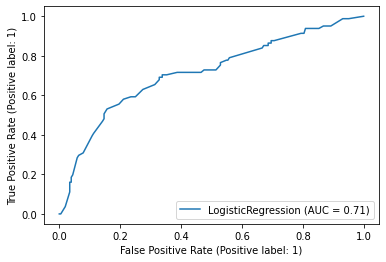

In [171]:
# Membuat chart ROC dan menghitung AUC
from sklearn.metrics import roc_auc_score, RocCurveDisplay
# Menghitung AUC
print('ROC Score:', roc_auc_score(test_pred, y_test))
# Plot kurva ROC dan nilai AUC
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.show()

In [172]:
# Perhitungan manual di excel. Download data
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
y_test.to_csv('y_test.csv') 
files.download('y_test.csv')

from numpy import savetxt
savetxt('test_pred.csv', test_pred, delimiter=',')
files.download('test_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2.3.5.4 Gain dan Lift Chart

In [173]:
!pip install scikit-plot

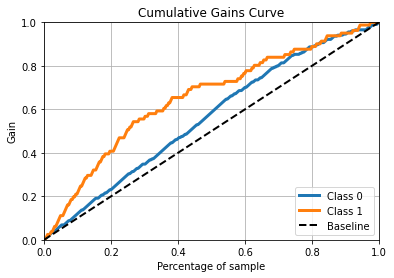

In [174]:
import matplotlib.pyplot as plt
import scikitplot as skplt

# Gain chart
skplt.metrics.plot_cumulative_gain(y_test, lr.predict_proba(X_test))
plt.show()

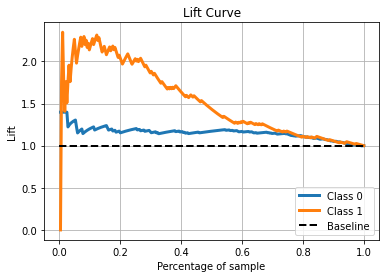

In [175]:
# Lift chart
skplt.metrics.plot_lift_curve(y_test, lr.predict_proba(X_test))
plt.show()

### 2.3.5.5 K-S (Kolmogorov-Smirnov)

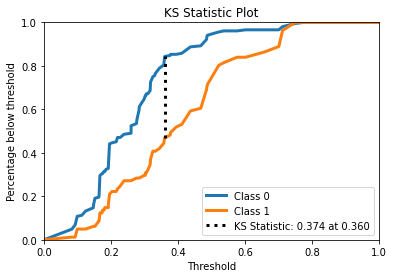

In [176]:
# K-S chart
skplt.metrics.plot_ks_statistic(y_test, lr.predict_proba(X_test))
plt.show()

### 2.3.5.6 PSI (Population Stability Index)

In [177]:
# Perhitungan PSI dilakukan di Excel dan bagian 2.3.4.4 Cara cepat membuat scorecard di Python: Library Scorecardpy

## 2.3.4.5 Modeling dengan teknik machine learning


### Contoh Decision Tree
Terdapat banyak variasi dan parameter untuk membuat decision Tree, berikut adalah contoh pembuatan decision tree berdasarkan parameter berikut
*   Tidak ada resampling
*   Menggunakan dummy variables
*   Menggunakan semua variabel input
*   Menggunakan decision tree dengan maksimum cabang 10





In [184]:
# Memilih variabel yang akan diinput ke dalam model
df_model_ML = df_clean[['default','SLIK_Kolektibilitas','DBR','Device_Apps_Segmentation'
                  ,'Lama_Cicilan','Usia','Device_Active_Since','API_CreditScore_Vendor_B'
                  ,'Mobile_Provider','Tujuan_Pinjaman','Device_Apps_Installed','Mobile_Number_Active_Since'
                  ,'Alamat_Rumah_Kantor'
                  ]]

# Memisahkan variabel kategori dengan variabel numerik
dataset_dummies = df_model_ML.select_dtypes(exclude = ['float64','int64','int'])
dataset_int = df_model_ML.select_dtypes(include=['float64','int64','int'])

# Memisahkan target/dependent variabel dari dataset dengan variabel kategori
target = df_model_ML['default']
dataset_int.drop(['default'], axis = 1, inplace = True)

# Menggunakan function get_dummies dari panda untuk melakukan one hot encoding
dataset_dummies_df = pd.get_dummies(dataset_dummies,drop_first = True)
    
# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
dataset = pd.concat([dataset_dummies_df, dataset_int], axis = 1)
feature_name = dataset.columns
df_encoded = pd.concat([dataset, target], axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


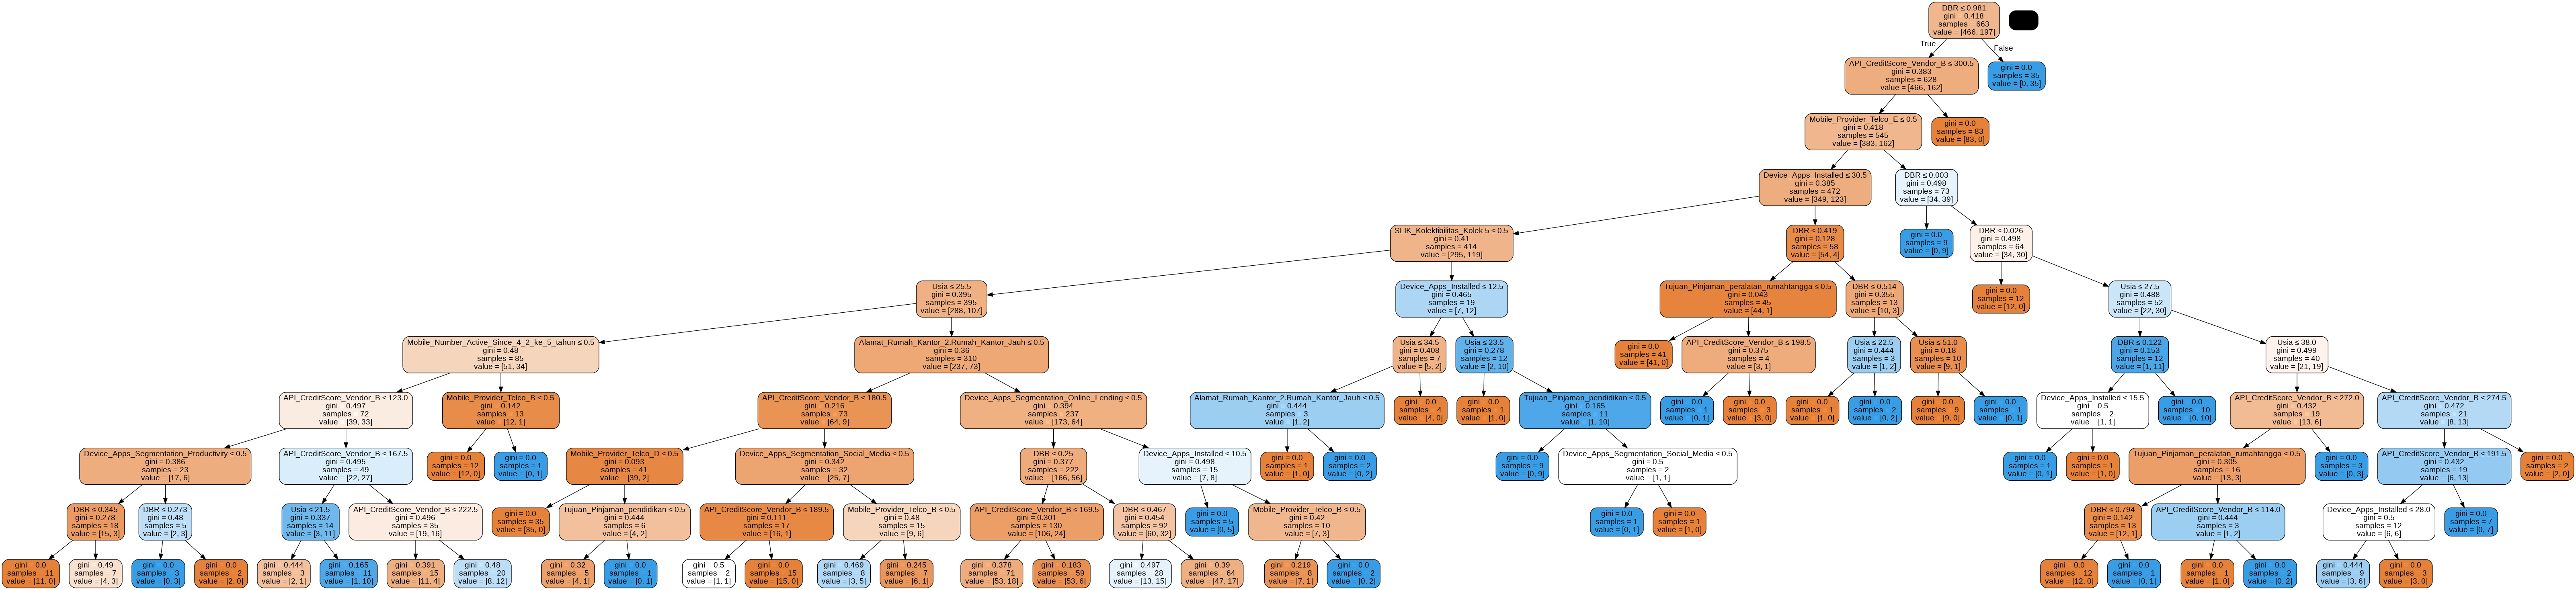

In [186]:
# Membagi dataset menjadi development(train) dan test
y = df_encoded.loc[:,'default']
X = df_encoded.loc[:,df_encoded.columns != 'default']

nama_kolom = X.columns

# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menggunakan fungsi DecisionTree dari library sklearn
from sklearn.tree import DecisionTreeClassifier

# Fungsi Decision Tree, menggunakan opsi parameter max_depth 10
model = DecisionTreeClassifier(max_depth=10)

# Melakukan model Decision Tree kepada data training
model.fit(X_train, y_train)

# Visualisasi dari Decision Tree
import pydotplus
import graphviz

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display, Image
from six import StringIO

# Untuk dapat menggunakan graphviz memerlukan instalasi library yang tepat, silahkan refer ke website berikut untuk petunjuk instalasi:
# https://stackoverflow.com/questions/27666846/pydot-invocationexception-graphvizs-executables-not-found

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = nama_kolom)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [187]:
# Obtain predictions from the test data 
predicted = model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

# Obtain model probabilities
probs = model.predict_proba(X_test)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test, probs[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       204
           1       0.50      0.54      0.52        81

    accuracy                           0.72       285
   macro avg       0.66      0.66      0.66       285
weighted avg       0.72      0.72      0.72       285

Confusion matrix:
 [[160  44]
 [ 37  44]]
ROC Score: 0.7108448317598643


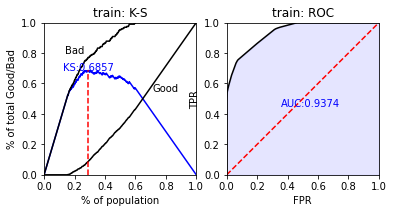

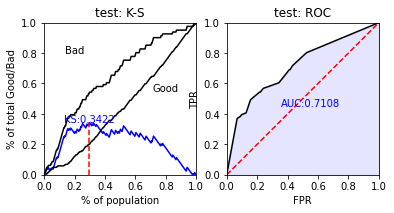

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [191]:
# predicted probability
train_pred = model.predict_proba(X_train)[:,1]
test_pred = model.predict_proba(X_test)[:,1]

# Replacing zero probability to a close to number to 0, to avoid division by 0 in scorecard formula
train_pred[train_pred <= 0] = 0.00000001
test_pred[test_pred <= 0] = 0.00000001
# Replacing 100% probability to a close to number to 1, to weird result in scorecard formula
train_pred[train_pred >= 1] = 0.99999999
test_pred[test_pred >= 1] = 0.99999999

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
# tidak bisa dilakukan karena logic model memperlukan coefficient regresi
#card = scpy.scorecard(bins_adj, xgb_model, X_train.columns, points0=600, odds0=1/20, pdo=50, basepoints_eq0=False)
# credit score
#train_score = scpy.scorecard_ply(train, card, print_step=0)
#test_score = scpy.scorecard_ply(test, card, print_step=0)

# Membuat scoring
P0 = 600 # Target Score
PDO = 50 # Target Odds
theta0 = 1.0/20 # Points double odds
B = PDO/np.log(2)
A = P0 + B * np.log(theta0)

train_score = A - B*np.log(train_pred/(1-train_pred))
test_score = A - B*np.log(test_pred/(1-test_pred))

df_score_train = pd.DataFrame(train_score, columns=['Score'])
df_score_test = pd.DataFrame(test_score, columns=['Score'])
df_score_train_prob = pd.DataFrame(train_pred, columns=['Probability'])
df_score_test_prob = pd.DataFrame(test_pred, columns=['Probability'])

# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
df_model_result = pd.concat([df_score_test, df_score_test_prob], axis = 1)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_model_result.to_csv('df_decision_tree_result.csv') 
files.download('df_decision_tree_result.csv')

### Contoh Random Forest
Terdapat banyak variasi dan parameter untuk membuat Random Forest, berikut adalah contoh pembuatan Random Forest berdasarkan parameter berikut
*   Tidak ada resampling
*   Menggunakan dummy variables
*   Menggunakan standar Random Forest

In [192]:
# Membagi dataset menjadi development(train) dan test
y = df_encoded.loc[:,'default']
X = df_encoded.loc[:,df_encoded.columns != 'default']

# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model as the random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Melakukan model Decision Tree kepada data training
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

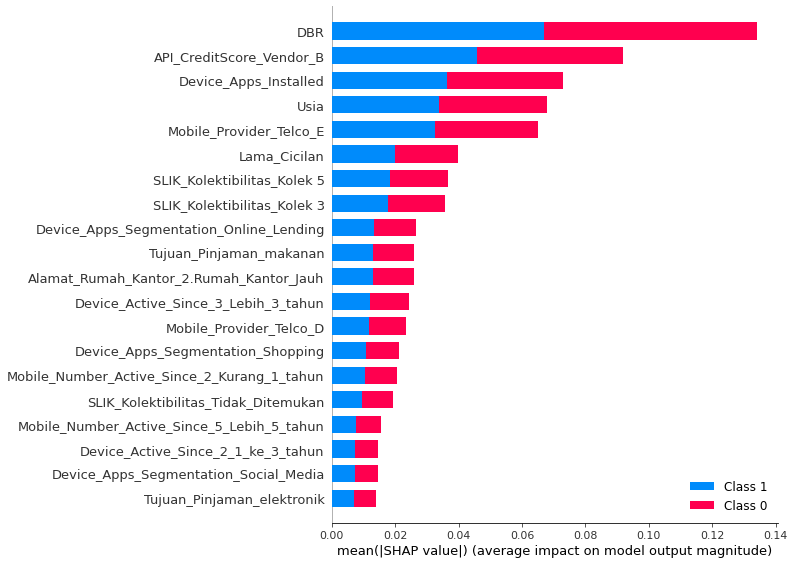

In [193]:
# Variabel performa pada model

import shap
import matplotlib.pyplot as plt

shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [194]:
# Obtain predictions from the test data 
predicted = model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

# Obtain model probabilities
probs = model.predict_proba(X_test)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test, probs[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.86       204
           1       0.76      0.36      0.49        81

    accuracy                           0.79       285
   macro avg       0.78      0.66      0.68       285
weighted avg       0.78      0.79      0.76       285

Confusion matrix:
 [[195   9]
 [ 52  29]]
ROC Score: 0.7767489711934157


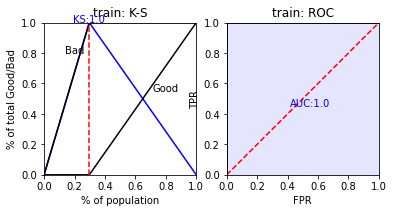

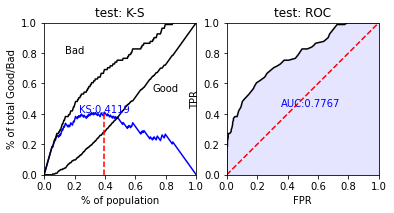

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [195]:
# predicted probability
train_pred = model.predict_proba(X_train)[:,1]
test_pred = model.predict_proba(X_test)[:,1]

# Replacing zero probability to a close to number to 0, to avoid division by 0 in scorecard formula
train_pred[train_pred <= 0] = 0.00000001
test_pred[test_pred <= 0] = 0.00000001
# Replacing 100% probability to a close to number to 1, to weird result in scorecard formula
train_pred[train_pred >= 1] = 0.99999999
test_pred[test_pred >= 1] = 0.99999999

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
# tidak bisa dilakukan karena logic model memperlukan coefficient regresi
#card = scpy.scorecard(bins_adj, xgb_model, X_train.columns, points0=600, odds0=1/20, pdo=50, basepoints_eq0=False)
# credit score
#train_score = scpy.scorecard_ply(train, card, print_step=0)
#test_score = scpy.scorecard_ply(test, card, print_step=0)

# Membuat scoring
P0 = 600 # Target Score
PDO = 50 # Target Odds
theta0 = 1.0/20 # Points double odds
B = PDO/np.log(2)
A = P0 + B * np.log(theta0)

train_score = A - B*np.log(train_pred/(1-train_pred))
test_score = A - B*np.log(test_pred/(1-test_pred))

df_score_train = pd.DataFrame(train_score, columns=['Score'])
df_score_test = pd.DataFrame(test_score, columns=['Score'])
df_score_train_prob = pd.DataFrame(train_pred, columns=['Probability'])
df_score_test_prob = pd.DataFrame(test_pred, columns=['Probability'])

# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
df_model_result = pd.concat([df_score_test, df_score_test_prob], axis = 1)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_model_result.to_csv('df_random_forest_result.csv') 
files.download('df_random_forest_result.csv')

### Contoh xgBoost
Terdapat banyak variasi dan parameter untuk membuat decision Tree, berikut adalah contoh pembuatan xgBoost berdasarkan parameter berikut
*   Tidak ada resampling
*   Menggunakan dummy variables
*   Menggunakan semua variabel input
*   Menggunakan parameter standar xgBoost

In [196]:
# Membagi dataset menjadi development(train) dan test
y = df_encoded.loc[:,'default']
X = df_encoded.loc[:,df_encoded.columns != 'default']

# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic', seed=42)
model.fit(X_train, y_train)

# Melakukan model Decision Tree kepada data training
model.fit(X_train, y_train)

XGBClassifier(seed=42)

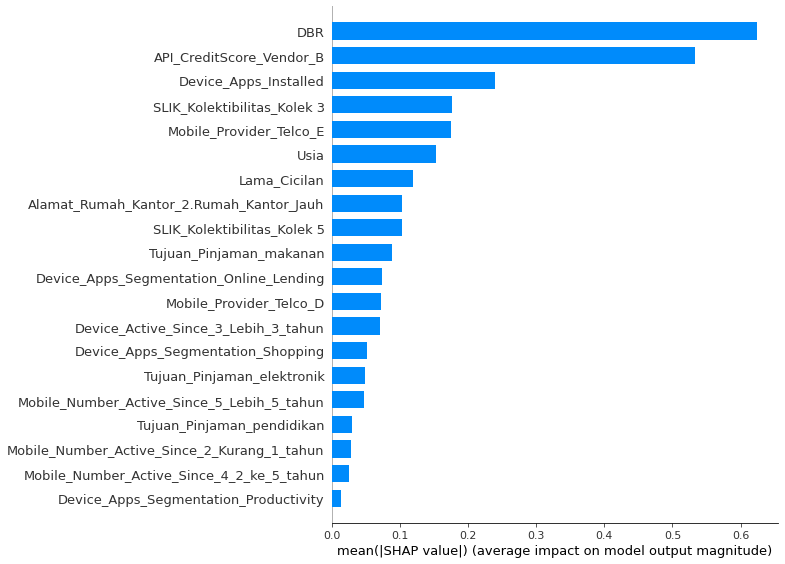

In [197]:
import shap
import matplotlib.pyplot as plt

shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

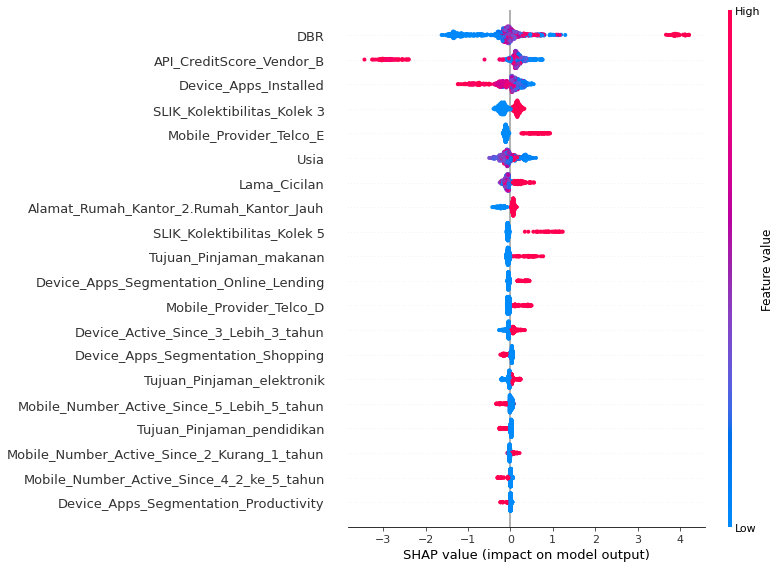

In [198]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [199]:
# Obtain predictions from the test data 
predicted = model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

# Obtain model probabilities
probs = model.predict_proba(X_test)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test, probs[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       204
           1       0.68      0.44      0.54        81

    accuracy                           0.78       285
   macro avg       0.74      0.68      0.70       285
weighted avg       0.77      0.78      0.77       285

Confusion matrix:
 [[187  17]
 [ 45  36]]
ROC Score: 0.7859477124183006
